In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Video_Games.csv')

In [3]:
data.shape

(16928, 17)

In [ ]:
print(data.info())
print(data.describe())

In [5]:
columns_for_corr = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count', 'User_Count', 'Global_Sales']

# Calculate the correlation matrix
correlation_matrix = data[columns_for_corr].corr()

# Display the correlation matrix
correlation_matrix

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Count,Global_Sales
NA_Sales,1.000000,0.767038,0.450361,0.639841,0.242378,0.294166,0.249769,0.941405
EU_Sales,0.767038,1.000000,0.434405,0.725070,0.221863,0.276813,0.287709,0.901956
JP_Sales,0.450361,0.434405,1.000000,0.290640,0.155022,0.180150,0.078346,0.611950
Other_Sales,0.639841,0.725070,0.290640,1.000000,0.199517,0.252262,0.243174,0.750155
Critic_Score,0.242378,0.221863,0.155022,0.199517,1.000000,0.424059,0.264358,0.247059
Critic_Count,0.294166,0.276813,0.180150,0.252262,0.424059,1.000000,0.362593,0.302676
User_Count,0.249769,0.287709,0.078346,0.243174,0.264358,0.362593,1.000000,0.269061
Global_Sales,0.941405,0.901956,0.611950,0.750155,0.247059,0.302676,0.269061,1.000000


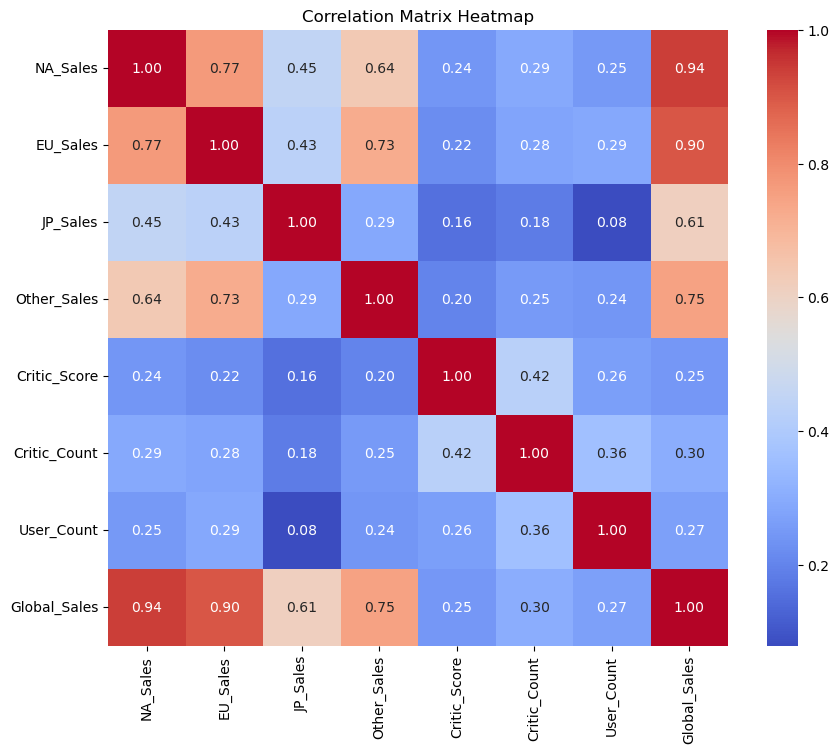

In [6]:
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=columns_for_corr, yticklabels=columns_for_corr)

# Display the plot
plt.title('Correlation Matrix Heatmap')
plt.show()

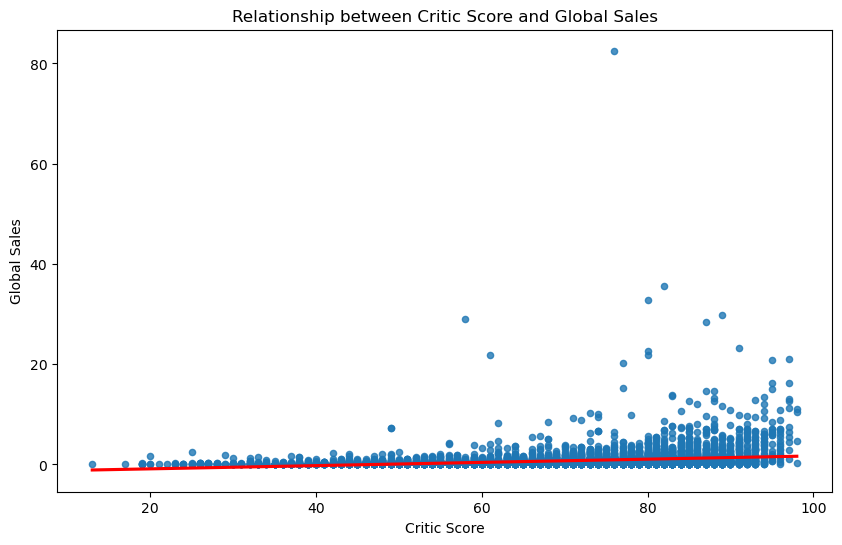

In [7]:
#raw data
# Plotting Global Sales vs. Critic Score using Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='Critic_Score', y='Global_Sales', data=data, scatter_kws={'s':20}, line_kws={'color':'red'})

# Adding labels and title
plt.xlabel('Critic Score')
plt.ylabel('Global Sales')
plt.title('Relationship between Critic Score and Global Sales')

# Show the plot
plt.show()

In [8]:
max_index = data['Global_Sales'].idxmax()

# Step 2: Drop the row with the highest 'Global_Sales' value
data.drop(index=max_index, inplace=True)

# Step 3: Verify that the highest value has been removed
print(data['Global_Sales'].max())

40.24


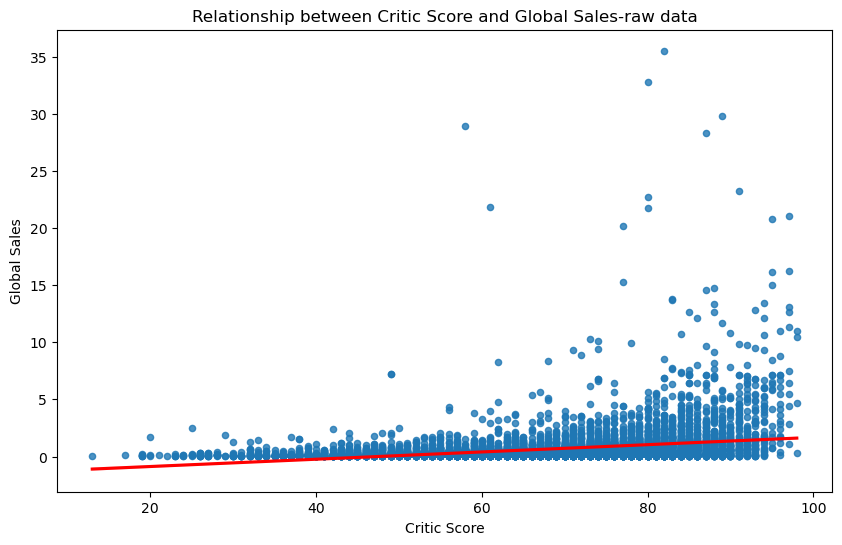

In [9]:

# Plotting Global Sales vs. Critic Score using Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='Critic_Score', y='Global_Sales', data=data, scatter_kws={'s':20}, line_kws={'color':'red'})

# Adding labels and title
plt.xlabel('Critic Score')
plt.ylabel('Global Sales')
plt.title('Relationship between Critic Score and Global Sales-raw data')

# Show the plot
plt.show()

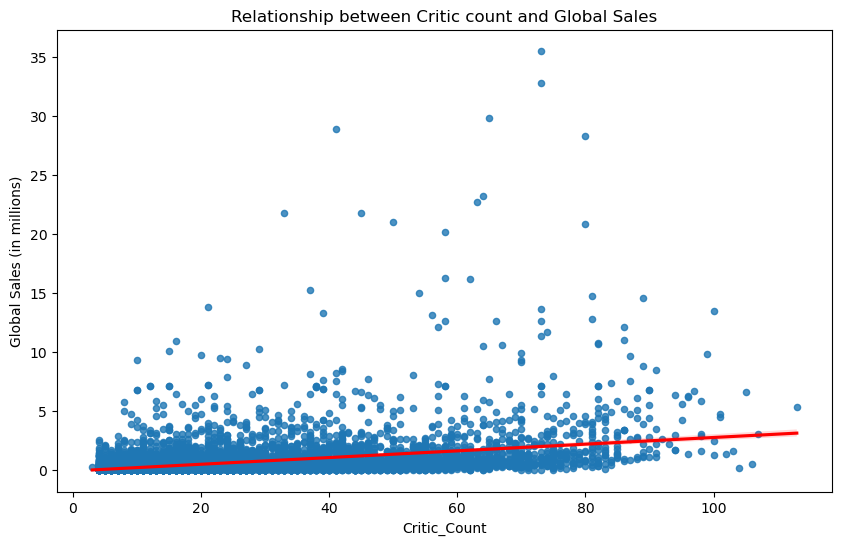

In [10]:
# Plotting Global Sales vs. Critic Score using Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='Critic_Count', y='Global_Sales', data=data, scatter_kws={'s':20}, line_kws={'color':'red'})

# Adding labels and title
plt.xlabel('Critic_Count')
plt.ylabel('Global Sales (in millions)')
plt.title('Relationship between Critic count and Global Sales')

# Show the plot
plt.show()

In [11]:
data.sample(5)

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
12535,12535,Project Setsuna,PS4,2016.0,Role-Playing,Square Enix,0.00,0.00,0.06,0.00,0.06,NaN,NaN,NaN,NaN,NaN,NaN
6219,6219,F-1 Grand Prix,SNES,1992.0,Racing,Video System,0.00,0.00,0.28,0.00,0.28,NaN,NaN,NaN,NaN,NaN,NaN
6761,6761,Classic NES Series: Excitebike,GBA,2004.0,Racing,Nintendo,0.11,0.04,0.10,0.01,0.25,66.0,12.0,tbd,NaN,Nintendo,E
5807,5807,My Virtual Tutor: Reading Adventure Pre-K to K...,DS,2009.0,Misc,Mentor Interactive,0.29,0.00,0.00,0.02,0.31,NaN,NaN,NaN,NaN,NaN,NaN
6455,6455,Deadly Premonition,X360,2010.0,Action,Rising Star Games,0.18,0.06,0.00,0.02,0.26,68.0,39.0,8.2,332.0,Access Games,M


In [12]:
data.isna().sum()

index                 0
Name                  2
Platform              0
Year_of_Release     273
Genre                 2
Publisher            55
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8668
Critic_Count       8668
User_Score         6769
User_Count         9210
Developer          6688
Rating             6836
dtype: int64

In [13]:
data.replace(' ',pd.NA, inplace=True)

In [14]:
data['Global_Sales'].isnull().sum()

0

In [15]:
print((data['NA_Sales'] == 0).sum())
print((data['Other_Sales'] == 0).sum())
print((data['EU_Sales'] == 0).sum())
print((data['JP_Sales'] == 0).sum())
print((data['Global_Sales'] == 0).sum())

4542
6643
5914
10649
0


In [16]:
missing_values =data.isna().sum()
missing_values

index                 0
Name                  2
Platform              0
Year_of_Release     273
Genre                 2
Publisher            55
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8668
Critic_Count       8668
User_Score         6769
User_Count         9210
Developer          6688
Rating             6836
dtype: int64

In [17]:
missing_ratio = missing_values / len(data)
missing_ratio

index              0.000000
Name               0.000118
Platform           0.000000
Year_of_Release    0.016128
Genre              0.000118
Publisher          0.003249
NA_Sales           0.000000
EU_Sales           0.000000
JP_Sales           0.000000
Other_Sales        0.000000
Global_Sales       0.000000
Critic_Score       0.512081
Critic_Count       0.512081
User_Score         0.399894
User_Count         0.544101
Developer          0.395108
Rating             0.403852
dtype: float64

In [18]:
data.drop('Other_Sales', axis='columns', inplace=True)
data.drop('NA_Sales', axis='columns', inplace=True)
data.drop('EU_Sales', axis='columns', inplace=True)
data.drop('JP_Sales', axis='columns', inplace=True)
data.drop('User_Score', axis='columns', inplace=True)
data.drop('User_Count', axis='columns', inplace=True)
data.drop('index', axis='columns', inplace=True)

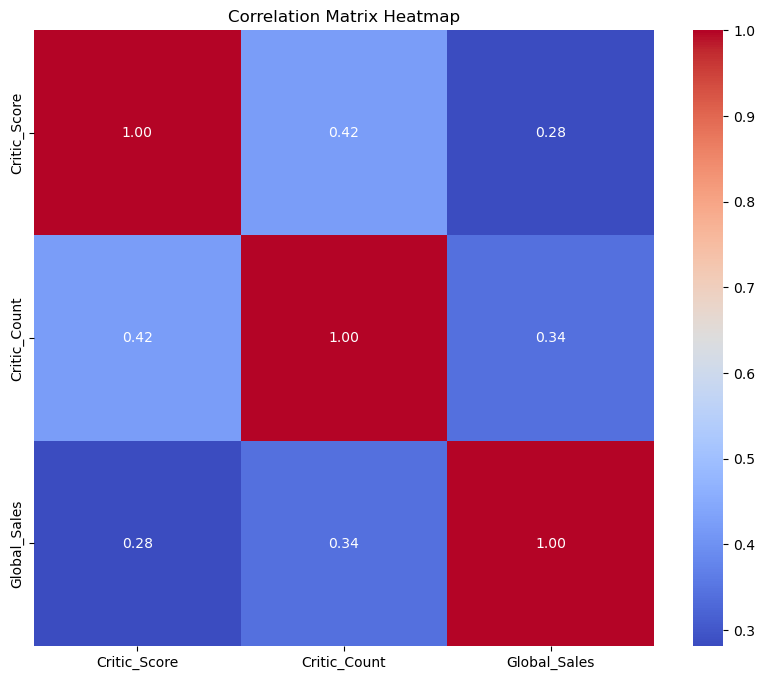

In [19]:
# Calculate the correlation matrix for the selected columns
columns_for_corr = ['Critic_Score', 'Critic_Count', 'Global_Sales']
correlation_matrix = data[columns_for_corr].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=columns_for_corr, yticklabels=columns_for_corr)

# Display the plot
plt.title('Correlation Matrix Heatmap')
plt.show()

In [20]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16927 entries, 1 to 16927
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16925 non-null  object 
 1   Platform         16927 non-null  object 
 2   Year_of_Release  16654 non-null  float64
 3   Genre            16925 non-null  object 
 4   Publisher        16872 non-null  object 
 5   Global_Sales     16927 non-null  float64
 6   Critic_Score     8259 non-null   float64
 7   Critic_Count     8259 non-null   float64
 8   Developer        10239 non-null  object 
 9   Rating           10091 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1.3+ MB
None


In [21]:
print(data.describe())

       Year_of_Release  Global_Sales  Critic_Score  Critic_Count
count     16654.000000  16927.000000   8259.000000   8259.000000
mean       2006.485349      0.534677     69.037050     26.425717
std           5.883065      1.416737     13.943832     18.989153
min        1980.000000      0.010000     13.000000      3.000000
25%        2003.000000      0.060000     60.000000     12.000000
50%        2007.000000      0.170000     71.000000     22.000000
75%        2010.000000      0.490000     79.000000     36.000000
max        2020.000000     40.240000     98.000000    113.000000


In [22]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     273
Genre                 2
Publisher            55
Global_Sales          0
Critic_Score       8668
Critic_Count       8668
Developer          6688
Rating             6836
dtype: int64

In [23]:
for col in data :
  print(f'{col}\t\t{data[col].dtype}')

Name		object
Platform		object
Year_of_Release		float64
Genre		object
Publisher		object
Global_Sales		float64
Critic_Score		float64
Critic_Count		float64
Developer		object
Rating		object


In [24]:
for col in data :
  print(f'{col}\t\t{data[col].unique()}')

Name		['Super Mario Bros.' 'Mario Kart Wii' 'Wii Sports Resort' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
Platform		['NES' 'Wii' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Year_of_Release		[1985. 2008. 2009. 1996. 1989. 2006. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983. 2020. 2017.]
Genre		['Platform' 'Racing' 'Sports' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
Publisher		['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital 

In [25]:
data.Global_Sales.values

array([40.24, 35.52, 32.77, ...,  0.6 ,  0.6 ,  0.6 ])

In [26]:
data.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
Developer           object
Rating              object
dtype: object

In [27]:
data.Year_of_Release.isnull().sum()

273

In [28]:
data[data.Year_of_Release.isnull()].shape

(273, 10)

In [29]:
data2 = data[data.Year_of_Release.notnull()]
data2.shape

(16654, 10)

In [30]:
# data.Year_of_Release.values

In [31]:
# Ensures numeric conversion
# data2.Year_of_Release = pd.to_numeric(data2.Year_of_Release, errors='coerce')

In [32]:
# Ensures numeric conversion
# data2.Year_of_Release = data2.Year_of_Release.astype('Int64')

In [33]:
data2.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
Developer           object
Rating              object
dtype: object

In [34]:
data2.isna().sum()

Name                  2
Platform              0
Year_of_Release       0
Genre                 2
Publisher            33
Global_Sales          0
Critic_Score       8552
Critic_Count       8552
Developer          6607
Rating             6747
dtype: int64

In [35]:
data_cleaned = data2.dropna(subset=['Name'])
data_cleaned = data_cleaned.dropna(subset=['Year_of_Release'])
data_cleaned = data_cleaned.dropna(subset=['Publisher'])
data_cleaned = data_cleaned.dropna(subset=['Genre'])

In [36]:
data_cleaned.shape

(16619, 10)

In [37]:
data_cleaned.isna().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
Global_Sales          0
Critic_Score       8518
Critic_Count       8518
Developer          6575
Rating             6714
dtype: int64

In [38]:
data_cleaned.shape

(16619, 10)

In [39]:
data_cleaned.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
Developer           object
Rating              object
dtype: object

In [40]:
for col in data_cleaned :
  print(f'{col}\t\t{data_cleaned[col].unique()}')

Name		['Super Mario Bros.' 'Mario Kart Wii' 'Wii Sports Resort' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
Platform		['NES' 'Wii' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Year_of_Release		[1985. 2008. 2009. 1996. 1989. 2006. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000. 1995. 1991. 1981. 1987. 1980.
 1983. 2020. 2017.]
Genre		['Platform' 'Racing' 'Sports' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
Publisher		['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainm

In [41]:
data_cleaned.Publisher.info()

<class 'pandas.core.series.Series'>
Index: 16619 entries, 1 to 16927
Series name: Publisher
Non-Null Count  Dtype 
--------------  ----- 
16619 non-null  object
dtypes: object(1)
memory usage: 259.7+ KB


In [42]:
data_cleaned.Publisher.describe()

count               16619
unique                579
top       Electronic Arts
freq                 1377
Name: Publisher, dtype: object

In [43]:
#data_cleaned = data_cleaned.drop('Name', axis=1)

In [44]:
data_cleaned.head()

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,Developer,Rating
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.52,82.0,73.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,32.77,80.0,73.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,30.26,NaN,NaN,NaN,NaN


In [45]:
for col in data_cleaned :
  print(f'{col}\t\t{data_cleaned[col].unique()}')

Name		['Super Mario Bros.' 'Mario Kart Wii' 'Wii Sports Resort' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
Platform		['NES' 'Wii' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Year_of_Release		[1985. 2008. 2009. 1996. 1989. 2006. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000. 1995. 1991. 1981. 1987. 1980.
 1983. 2020. 2017.]
Genre		['Platform' 'Racing' 'Sports' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
Publisher		['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainm

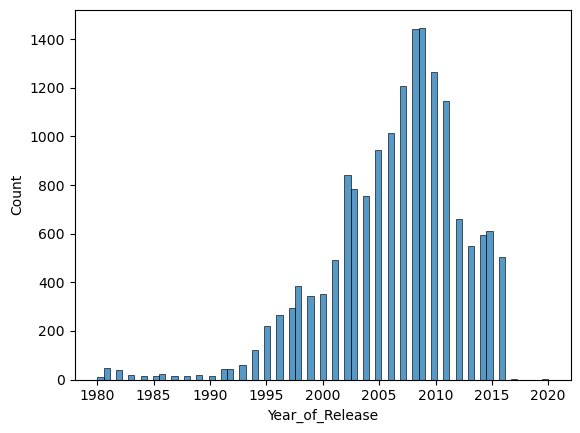

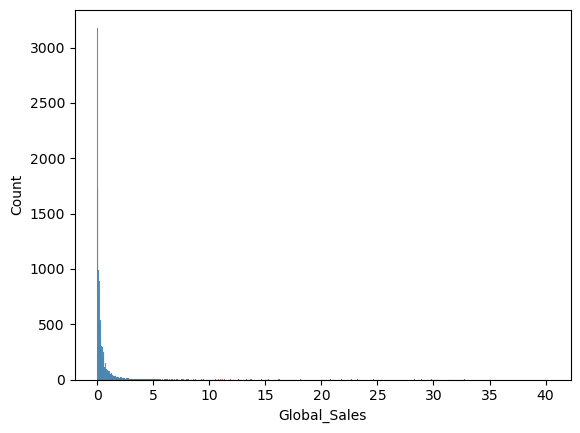

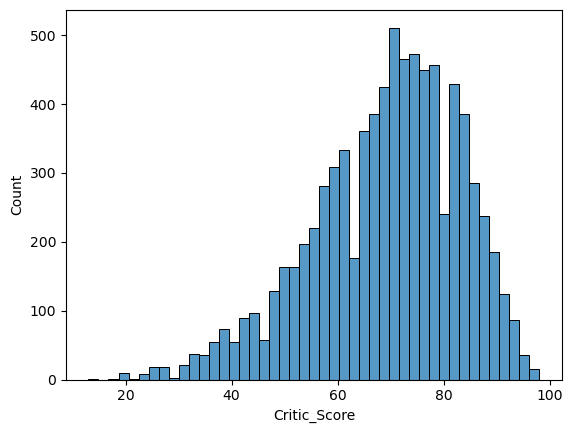

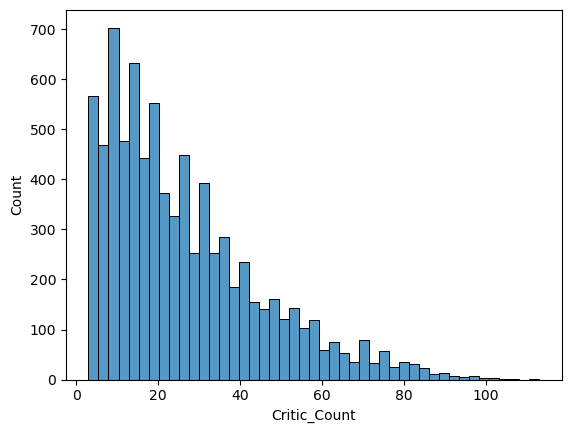

In [46]:
for i in data_cleaned.select_dtypes(include="number").columns:
    sns.histplot(data=data_cleaned,x=i)
    plt.show()

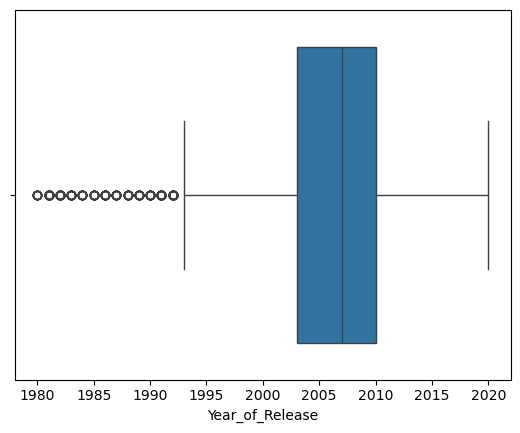

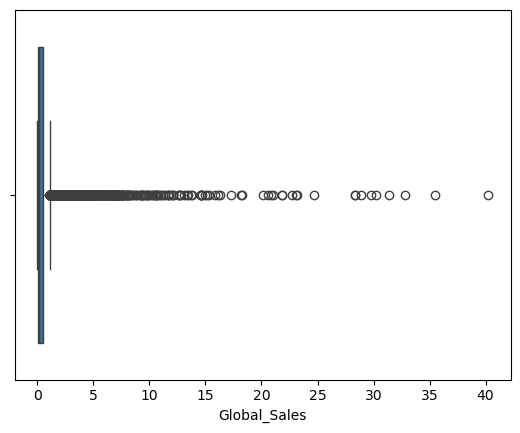

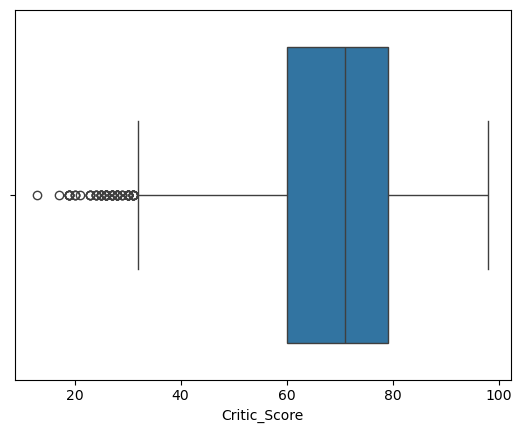

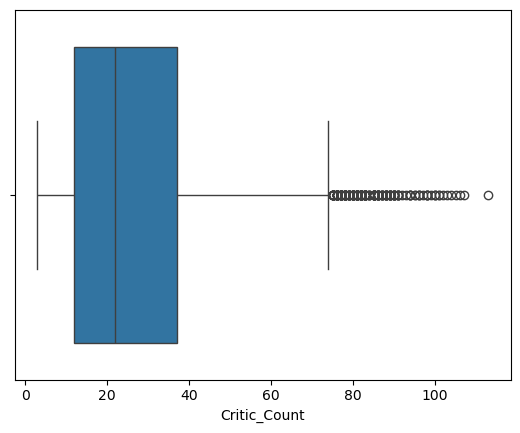

In [47]:
for i in data_cleaned.select_dtypes(include="number").columns:
    sns.boxplot(data=data_cleaned,x=i)
    plt.show()

In [48]:
# Removing outliers from 'Global_Sales' using the IQR (Interquartile Range) method
Q1 = data_cleaned['Global_Sales'].quantile(0.25)
Q3 = data_cleaned['Global_Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data by removing outliers beyond the bounds
data_no_outliers = data_cleaned[(data_cleaned['Global_Sales'] >= lower_bound) & (data_cleaned['Global_Sales'] <= upper_bound)]

# Show the number of rows before and after outlier removal
rows_before = data_cleaned.shape[0]
rows_after = data_no_outliers.shape[0]

print(f"Rows before outlier removal: {rows_before}")
print(f"Rows after outlier removal: {rows_after}")

# To get the updated Global_Sales statistics after outlier removal
print(data_no_outliers['Global_Sales'].describe())


Rows before outlier removal: 16619
Rows after outlier removal: 14824
count    14824.000000
mean         0.238728
std          0.251972
min          0.010000
25%          0.050000
50%          0.140000
75%          0.340000
max          1.130000
Name: Global_Sales, dtype: float64


In [154]:
print(data_cleaned['Global_Sales'].max())

40.24


In [49]:
#publisher eka kaduwe category wlata

In [50]:
# First, calculate the frequency of each publisher
# publisher_counts = data_no_outliers['Publisher'].value_counts()

# # Define publishers with 300 or more occurrences
# top_publishers = publisher_counts[publisher_counts >= 300].index

# # Create a new 'Publisher_Categorized' column
# data_no_outliers['Publisher_Categorized'] = data_no_outliers['Publisher'].apply(
#     lambda x: x if x in top_publishers else 'Others'
# )

# # Check the new categories
# print(data_no_outliers['Publisher_Categorized'].value_counts())

In [51]:
# # Step 1: Calculate the frequency of each platform
# platform_counts = data_no_outliers['Platform'].value_counts()

# # Step 2: Define platforms with 1000 or more occurrences
# top_platforms = platform_counts[platform_counts >= 1000].index

# # Step 3: Create a new 'Platform_Categorized' column
# data_no_outliers['Platform_Categorized'] = data_no_outliers['Platform'].apply(
#     lambda x: x if x in top_platforms else 'Others'
# )

# # Step 4: Get the unique platform names categorized as 'Others'
# others_platforms = data_no_outliers.loc[data_no_outliers['Platform_Categorized'] == 'Others', 'Platform'].unique()

# # Step 5: Check the new categories
# print(data_no_outliers['Platform_Categorized'].value_counts())
# print("Platforms categorized as 'Others':", others_platforms)

In [52]:
data_no_outliers.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,Developer,Rating
1802,MechAssault,XB,2002.0,Simulation,Microsoft Game Studios,1.13,87.0,32.0,Day 1 Studios,T
1803,EA Sports Active: More Workouts,Wii,2009.0,Sports,Electronic Arts,1.13,80.0,15.0,Electronic Arts,E
1804,Derby Stallion 99,PS,1999.0,Sports,ASCII Entertainment,1.13,NaN,NaN,NaN,NaN
1805,Cars,GBA,2006.0,Racing,THQ,1.13,50.0,8.0,Helixe,E
1806,Watch Dogs 2,PS4,2016.0,Action,Ubisoft,1.13,83.0,88.0,Ubisoft Montreal,M


In [53]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Columns to be scaled
columns_to_scale = ['Global_Sales', 'Critic_Score', 'Critic_Count','Year_of_Release']

# Fit and transform the data
data_no_outliers[columns_to_scale] = scaler.fit_transform(data_no_outliers[columns_to_scale])

# Display the scaled values
print(data_no_outliers[columns_to_scale].describe())

       Global_Sales  Critic_Score  Critic_Count  Year_of_Release
count  14824.000000   6929.000000   6929.000000     14824.000000
mean       0.204222      0.638271      0.201046         0.667451
std        0.224975      0.159320      0.159551         0.141665
min        0.000000      0.000000      0.000000         0.000000
25%        0.035714      0.541176      0.077670         0.575000
50%        0.116071      0.658824      0.165049         0.700000
75%        0.294643      0.752941      0.291262         0.750000
max        1.000000      1.000000      1.000000         1.000000


C:\Users\User\AppData\Local\Temp\ipykernel_17136\3544988526.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers[columns_to_scale] = scaler.fit_transform(data_no_outliers[columns_to_scale])


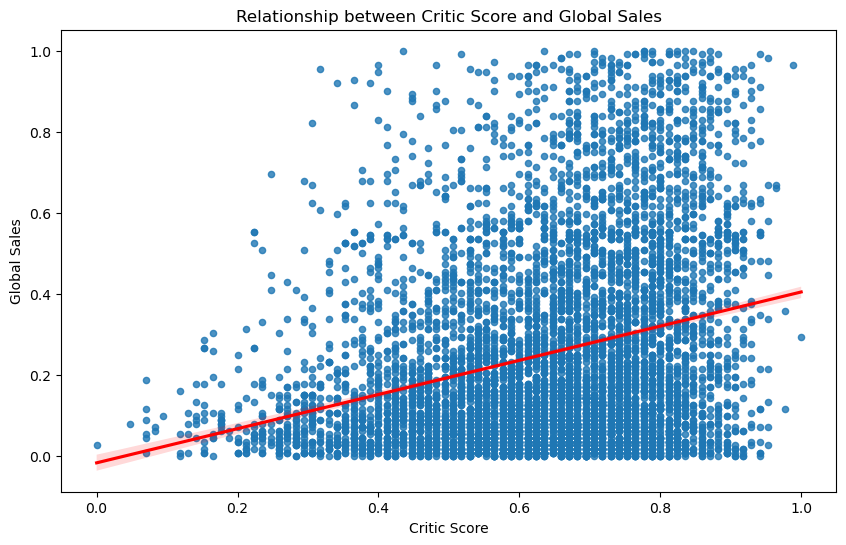

In [54]:
# Plotting Global Sales vs. Critic Score using Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='Critic_Score', y='Global_Sales', data=data_no_outliers, scatter_kws={'s':20}, line_kws={'color':'red'})

# Adding labels and title
plt.xlabel('Critic Score')
plt.ylabel('Global Sales')
plt.title('Relationship between Critic Score and Global Sales')

# Show the plot
plt.show()

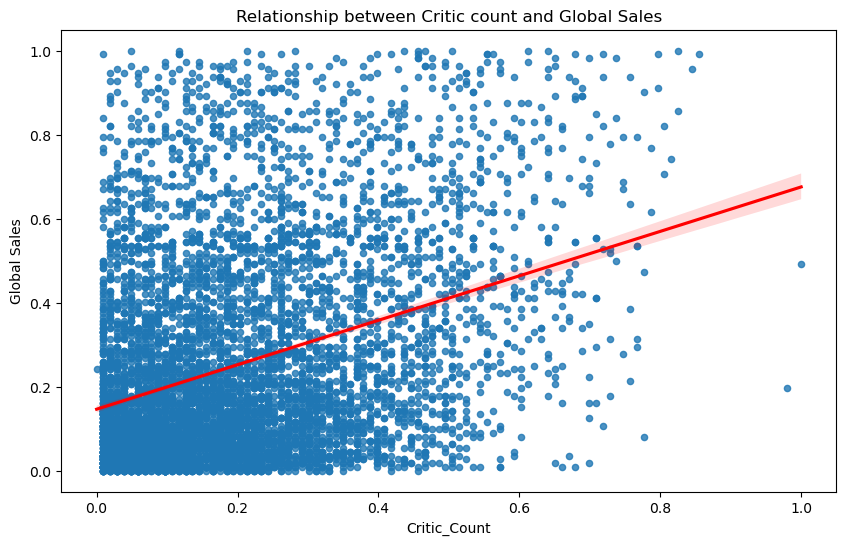

In [55]:
# Plotting Global Sales vs. Critic Score using Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='Critic_Count', y='Global_Sales', data=data_no_outliers, scatter_kws={'s':20}, line_kws={'color':'red'})

# Adding labels and title
plt.xlabel('Critic_Count')
plt.ylabel('Global Sales')
plt.title('Relationship between Critic count and Global Sales')

# Show the plot
plt.show()

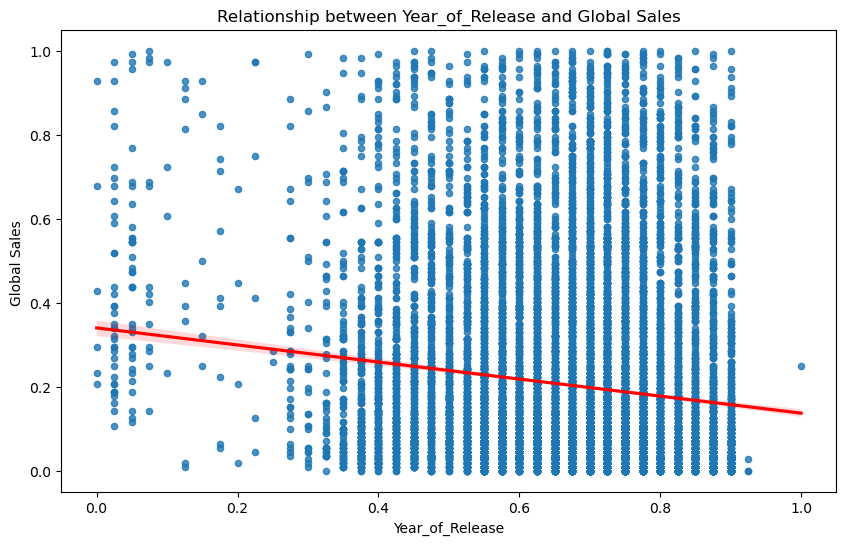

In [56]:
# Plotting Global Sales vs. Critic Score using Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='Year_of_Release', y='Global_Sales', data=data_no_outliers, scatter_kws={'s':20}, line_kws={'color':'red'})

# Adding labels and title
plt.xlabel('Year_of_Release')
plt.ylabel('Global Sales ')
plt.title('Relationship between Year_of_Release and Global Sales')

# Show the plot
plt.show()

In [57]:
data_no_outliers.isna().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
Global_Sales          0
Critic_Score       7895
Critic_Count       7895
Developer          6016
Rating             6152
dtype: int64

In [58]:
# Define ranges--->no need to categorize Global_Sales
#  Compute means for each range and fill missing values
def fill_critic_score(row, data_no_outliers):
    if pd.isna(row['Critic_Score']):
        if row['Global_Sales'] <= 0.25:
            mean_value = data_no_outliers.loc[(data_no_outliers['Global_Sales'] <= 0.25), 'Critic_Score'].mean()
        elif 0.25 < row['Global_Sales'] <= 0.5:
            mean_value = data_no_outliers.loc[(data_no_outliers['Global_Sales'] > 0.25) & (data_no_outliers['Global_Sales'] <= 0.5), 'Critic_Score'].mean()
        elif 0.5 < row['Global_Sales'] <= 0.75:
            mean_value = data_no_outliers.loc[(data_no_outliers['Global_Sales'] > 0.5) & (data_no_outliers['Global_Sales'] <= 0.75), 'Critic_Score'].mean()
        elif 0.75 < row['Global_Sales'] <= 1:
            mean_value = data_no_outliers.loc[(data_no_outliers['Global_Sales'] > 0.75) & (data_no_outliers['Global_Sales'] <= 1), 'Critic_Score'].mean()
        return mean_value
    return row['Critic_Score']

# Apply the function to fill missing Critic_Score values
data_no_outliers['Critic_Score_Filled'] = data_no_outliers.apply(lambda row: fill_critic_score(row, data_no_outliers), axis=1)
print(data_no_outliers)

                                             Name Platform  Year_of_Release  \
1802                                  MechAssault       XB            0.550   
1803              EA Sports Active: More Workouts      Wii            0.725   
1804                            Derby Stallion 99       PS            0.475   
1805                                         Cars      GBA            0.650   
1806                                 Watch Dogs 2      PS4            0.900   
...                                           ...      ...              ...   
16923                    Aliens: Colonial Marines      PS3            0.825   
16924  Backyard Wrestling: Don't Try This at Home      PS2            0.575   
16925                          Yakuza: Dead Souls      PS3            0.775   
16926                         Fight Night Round 2       XB            0.625   
16927           MonHun Nikki: Poka Poka Ailu Mura      PSP            0.750   

              Genre               Publisher  Global

C:\Users\User\AppData\Local\Temp\ipykernel_17136\865274715.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers['Critic_Score_Filled'] = data_no_outliers.apply(lambda row: fill_critic_score(row, data_no_outliers), axis=1)


In [59]:
def fill_critic_count(row, data_no_outliers):
    if pd.isna(row['Critic_Count']):
        if row['Global_Sales'] <= 0.25:
            mean_value = data_no_outliers.loc[(data_no_outliers['Global_Sales'] <= 0.25), 'Critic_Count'].mean()
        elif 0.25 < row['Global_Sales'] <= 0.5:
            mean_value = data_no_outliers.loc[(data_no_outliers['Global_Sales'] > 0.25) & (data_no_outliers['Global_Sales'] <= 0.5), 'Critic_Count'].mean()
        elif 0.5 < row['Global_Sales'] <= 0.75:
            mean_value = data_no_outliers.loc[(data_no_outliers['Global_Sales'] > 0.5) & (data_no_outliers['Global_Sales'] <= 0.75), 'Critic_Count'].mean()
        elif 0.75 < row['Global_Sales'] <= 1:
            mean_value = data_no_outliers.loc[(data_no_outliers['Global_Sales'] > 0.75) & (data_no_outliers['Global_Sales'] <= 1), 'Critic_Count'].mean()
        return mean_value
    return row['Critic_Count']

# Apply the function to fill missing Critic_Count values
data_no_outliers['Critic_Count_Filled'] = data_no_outliers.apply(lambda row: fill_critic_count(row, data_no_outliers), axis=1)

# Print the DataFrame with filled values
print(data_no_outliers)

                                             Name Platform  Year_of_Release  \
1802                                  MechAssault       XB            0.550   
1803              EA Sports Active: More Workouts      Wii            0.725   
1804                            Derby Stallion 99       PS            0.475   
1805                                         Cars      GBA            0.650   
1806                                 Watch Dogs 2      PS4            0.900   
...                                           ...      ...              ...   
16923                    Aliens: Colonial Marines      PS3            0.825   
16924  Backyard Wrestling: Don't Try This at Home      PS2            0.575   
16925                          Yakuza: Dead Souls      PS3            0.775   
16926                         Fight Night Round 2       XB            0.625   
16927           MonHun Nikki: Poka Poka Ailu Mura      PSP            0.750   

              Genre               Publisher  Global

C:\Users\User\AppData\Local\Temp\ipykernel_17136\1020331719.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers['Critic_Count_Filled'] = data_no_outliers.apply(lambda row: fill_critic_count(row, data_no_outliers), axis=1)


In [60]:
data_no_outliers.sample(5)

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,Developer,Rating,Critic_Score_Filled,Critic_Count_Filled
8905,Shenmue II,DC,0.525,Adventure,Sega,0.125000,0.882353,0.058252,Sega AM2,T,0.882353,0.058252
7489,Dead to Rights: Retribution,X360,0.750,Shooter,Namco Bandai Games,0.178571,0.564706,0.592233,Volatile Games,M,0.564706,0.592233
10082,Shinseiki Evangelion: Koutetsu no Girlfriend,SAT,0.450,Adventure,Sega,0.089286,NaN,NaN,NaN,NaN,0.608305,0.164764
2836,Test Drive 6,PS,0.475,Racing,Atari,0.633929,NaN,NaN,NaN,NaN,0.704439,0.277385
3953,Paws & Claws: Dogs & Cats Best Friends,DS,0.675,Simulation,THQ,0.437500,NaN,NaN,NaN,NaN,0.668613,0.239020


In [61]:
# Replace null values in 'Rating' column with 'unknown'
data_no_outliers['Rating'].fillna('unknown', inplace=True)

# Verify if null values are replaced
data_no_outliers['Rating'].isnull().sum() 

C:\Users\User\AppData\Local\Temp\ipykernel_17136\2950700619.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_no_outliers['Rating'].fillna('unknown', inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_17136\2950700619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers['Rating'].fillna('unknown', inplace=True)


0

In [62]:
# Replace null values in 'Rating' column with 'unknown'
data_no_outliers['Developer'].fillna('unknown', inplace=True)

# Verify if null values are replaced
data_no_outliers['Developer'].isnull().sum() 

C:\Users\User\AppData\Local\Temp\ipykernel_17136\1133372964.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_no_outliers['Developer'].fillna('unknown', inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_17136\1133372964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers['Developer'].fillna('unknown', inplace=Tru

0

In [63]:
data_no_outliers.sample(10)

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,Developer,Rating,Critic_Score_Filled,Critic_Count_Filled
8399,How to Train Your Dragon 2,X360,0.850,Adventure,Little Orbit,0.142857,NaN,NaN,Torus Games,E10+,0.608305,0.164764
8522,SD Gundam G Generation 3D,3DS,0.775,Role-Playing,Namco Bandai Games,0.133929,NaN,NaN,unknown,unknown,0.608305,0.164764
8323,Bomberman 64: The Second Attack!,N64,0.475,Adventure,Hudson Soft,0.142857,NaN,NaN,unknown,unknown,0.608305,0.164764
5307,CSI: Deadly Intent - The Hidden Cases,DS,0.725,Adventure,Ubisoft,0.303571,NaN,NaN,unknown,unknown,0.668613,0.239020
7356,RealSports Baseball,2600,0.025,Sports,Atari,0.178571,NaN,NaN,unknown,unknown,0.608305,0.164764
5983,From TV Animation One Piece: Treasure Battle!,GC,0.550,Fighting,Namco Bandai Games,0.250000,NaN,NaN,unknown,unknown,0.608305,0.164764
6807,K-1 Revenge,PS,0.425,Fighting,Xing Entertainment,0.205357,NaN,NaN,unknown,unknown,0.608305,0.164764
6678,NBA Showtime: NBA on NBC,N64,0.475,Sports,Midway Games,0.214286,NaN,NaN,unknown,unknown,0.608305,0.164764
6877,Front Mission: Gun Hazard,SNES,0.400,Role-Playing,SquareSoft,0.205357,NaN,NaN,unknown,unknown,0.608305,0.164764
6105,X-Men: Reign of Apocalypse,GBA,0.525,Action,Activision,0.241071,0.564706,0.067961,Digital Eclipse,E,0.564706,0.067961


In [64]:
data_no_outliers.isnull().sum()

Name                      0
Platform                  0
Year_of_Release           0
Genre                     0
Publisher                 0
Global_Sales              0
Critic_Score           7895
Critic_Count           7895
Developer                 0
Rating                    0
Critic_Score_Filled       0
Critic_Count_Filled       0
dtype: int64

In [65]:
print(data_no_outliers.Platform.describe())

count     14824
unique       31
top          DS
freq       2013
Name: Platform, dtype: object


In [66]:
platform_frequencies = data_no_outliers['Platform'].value_counts()
platform_frequencies

Platform
DS      2013
PS2     1863
Wii     1171
PSP     1156
PS3     1129
X360    1051
PS      1033
PC       897
XB       769
GBA      742
GC       506
3DS      477
PSV      428
PS4      326
N64      277
XOne     206
SNES     197
SAT      173
WiiU     132
2600     102
GB        47
DC        47
NES       35
GEN       17
NG        12
WS         6
SCD        5
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

In [67]:
# Step 1: Calculate the frequency of each platform
platform_counts = data_no_outliers['Platform'].value_counts()

# Step 2: Define platforms with 1000 or more occurrences
top_platforms = platform_counts[platform_counts >= 800].index

# Step 3: Create a new 'Platform_Categorized' column
data_no_outliers['Platform_Categorized'] = data_no_outliers['Platform'].apply(
    lambda x: x if x in top_platforms else 'Others'
)

# Step 4: Get the unique platform names categorized as 'Others'
others_platforms = data_no_outliers.loc[data_no_outliers['Platform_Categorized'] == 'Others', 'Platform'].unique()

# Step 5: Check the new categories
print(data_no_outliers['Platform_Categorized'].value_counts())
print("Platforms categorized as 'Others':", others_platforms)

Platform_Categorized
Others    4511
DS        2013
PS2       1863
Wii       1171
PSP       1156
PS3       1129
X360      1051
PS        1033
PC         897
Name: count, dtype: int64
Platforms categorized as 'Others': ['XB' 'GBA' 'PS4' '3DS' 'NES' '2600' 'N64' 'PSV' 'GEN' 'WiiU' 'GB' 'GC'
 'DC' 'XOne' 'SAT' 'SNES' 'WS' 'NG' 'SCD' 'TG16' '3DO' 'GG' 'PCFX']


C:\Users\User\AppData\Local\Temp\ipykernel_17136\1589040760.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers['Platform_Categorized'] = data_no_outliers['Platform'].apply(


In [68]:
data_no_outliers.Genre.describe()

count      14824
unique        12
top       Action
freq        2982
Name: Genre, dtype: object

In [69]:
Genre_frequencies = data_no_outliers['Genre'].value_counts()
Genre_frequencies

Genre
Action          2982
Sports          2080
Misc            1577
Role-Playing    1314
Adventure       1267
Shooter         1093
Racing          1087
Simulation       785
Fighting         745
Platform         721
Strategy         651
Puzzle           522
Name: count, dtype: int64

In [70]:
#publisher eka kaduwe category wlata

In [71]:
data_no_outliers.Publisher.describe()

count               14824
unique                571
top       Electronic Arts
freq                 1082
Name: Publisher, dtype: object

In [72]:
Publisher_frequencies = data_no_outliers['Publisher'].value_counts()
Publisher_frequencies

Publisher
Electronic Arts                 1082
Namco Bandai Games               904
Activision                       854
Ubisoft                          852
Konami Digital Entertainment     776
                                ... 
Elite                              1
Evolution Games                    1
Aria                               1
Altron                             1
Red Flagship                       1
Name: count, Length: 571, dtype: int64

In [73]:
# First, calculate the frequency of each publisher
publisher_counts = data_no_outliers['Publisher'].value_counts()

# Define publishers with 300 or more occurrences
top_publishers = publisher_counts[publisher_counts >= 450].index

# Create a new 'Publisher_Categorized' column
data_no_outliers['Publisher_Categorized'] = data_no_outliers['Publisher'].apply(
    lambda x: x if x in top_publishers else 'Others'
)

# Check the new categories
print(data_no_outliers['Publisher_Categorized'].value_counts())

Publisher_Categorized
Others                          8558
Electronic Arts                 1082
Namco Bandai Games               904
Activision                       854
Ubisoft                          852
Konami Digital Entertainment     776
THQ                              644
Sega                             585
Sony Computer Entertainment      569
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_17136\782365142.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers['Publisher_Categorized'] = data_no_outliers['Publisher'].apply(


In [74]:
data_no_outliers.Developer.describe()

count       14824
unique       1622
top       unknown
freq         6016
Name: Developer, dtype: object

In [75]:
Developer_frequencies = data_no_outliers['Developer'].value_counts()
Developer_frequencies

Developer
unknown               6016
Ubisoft                176
Konami                 142
EA Canada              129
EA Sports              124
                      ... 
Next Entertainment       1
Toolbox Design           1
Transmission Games       1
K2, Kurogane             1
Interchannel-Holon       1
Name: count, Length: 1622, dtype: int64

In [76]:
#null values walata other kiyla dmme.methana other kiylama dammama deka ekathu wenwa

developer_counts = data_no_outliers['Developer'].value_counts()

# Step 2: Define developers with 1000 or more occurrences
top_developers = developer_counts[developer_counts >= 80].index

# Step 3: Create a new 'Developer_Categorized' column
data_no_outliers['Developer_Categorized'] = data_no_outliers['Developer'].apply(
    lambda x: x if x in top_developers else 'Others'
)

# Step 4: Get the unique developer names categorized as 'Others'
others_developers = data_no_outliers.loc[data_no_outliers['Developer_Categorized'] == 'Others', 'Developer'].unique()

# Step 5: Check the new categories
print(data_no_outliers['Developer_Categorized'].value_counts())
print("Developers categorized as 'Others':", others_developers)

Developer_Categorized
Others             7956
unknown            6016
Ubisoft             176
Konami              142
EA Canada           129
EA Sports           124
Capcom              105
Electronic Arts      92
EA Tiburon           84
Name: count, dtype: int64
Developers categorized as 'Others': ['Day 1 Studios' 'Helixe' 'Ubisoft Montreal' ... 'Big Red Software'
 'Atomic Games' 'Interchannel-Holon']


C:\Users\User\AppData\Local\Temp\ipykernel_17136\1343742479.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers['Developer_Categorized'] = data_no_outliers['Developer'].apply(


In [77]:
data_no_outliers.Rating.describe()

count       14824
unique          8
top       unknown
freq         6152
Name: Rating, dtype: object

In [78]:
Rating_frequencies = data_no_outliers['Rating'].value_counts()
Rating_frequencies

Rating
unknown    6152
E          3513
T          2627
E10+       1283
M          1239
EC            8
RP            1
K-A           1
Name: count, dtype: int64

In [79]:
data_no_outliers

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,Developer,Rating,Critic_Score_Filled,Critic_Count_Filled,Platform_Categorized,Publisher_Categorized,Developer_Categorized
1802,MechAssault,XB,0.550,Simulation,Microsoft Game Studios,1.000000,0.870588,0.281553,Day 1 Studios,T,0.870588,0.281553,Others,Others,Others
1803,EA Sports Active: More Workouts,Wii,0.725,Sports,Electronic Arts,1.000000,0.788235,0.116505,Electronic Arts,E,0.788235,0.116505,Wii,Electronic Arts,Electronic Arts
1804,Derby Stallion 99,PS,0.475,Sports,ASCII Entertainment,1.000000,NaN,NaN,unknown,unknown,0.735948,0.322064,PS,Others,unknown
1805,Cars,GBA,0.650,Racing,THQ,1.000000,0.435294,0.048544,Helixe,E,0.435294,0.048544,Others,THQ,Others
1806,Watch Dogs 2,PS4,0.900,Action,Ubisoft,1.000000,0.823529,0.825243,Ubisoft Montreal,M,0.823529,0.825243,Others,Ubisoft,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16923,Aliens: Colonial Marines,PS3,0.825,Shooter,Sega,0.526786,0.352941,0.213592,Gearbox Software,M,0.352941,0.213592,PS3,Sega,Others
16924,Backyard Wrestling: Don't Try This at Home,PS2,0.575,Fighting,Eidos Interactive,0.526786,0.447059,0.203883,Paradox Development,M,0.447059,0.203883,PS2,Others,Others
16925,Yakuza: Dead Souls,PS3,0.775,Shooter,Sega,0.526786,0.600000,0.504854,Ryu ga Gotoku Studios,M,0.600000,0.504854,PS3,Sega,Others
16926,Fight Night Round 2,XB,0.625,Fighting,Electronic Arts,0.526786,0.882353,0.436893,EA Sports,T,0.882353,0.436893,Others,Electronic Arts,EA Sports


In [80]:
data_no_outliers.isna().sum()

Name                        0
Platform                    0
Year_of_Release             0
Genre                       0
Publisher                   0
Global_Sales                0
Critic_Score             7895
Critic_Count             7895
Developer                   0
Rating                      0
Critic_Score_Filled         0
Critic_Count_Filled         0
Platform_Categorized        0
Publisher_Categorized       0
Developer_Categorized       0
dtype: int64

In [81]:
data_no_outliers.drop(columns=['Platform'], inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_17136\3125398659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers.drop(columns=['Platform'], inplace=True)


In [82]:
data_no_outliers.drop(columns=['Name'], inplace=True)
data_no_outliers.drop(columns=['Publisher'], inplace=True)
data_no_outliers.drop(columns=['Developer'], inplace=True)
data_no_outliers.drop(columns=['Critic_Score'], inplace=True)
data_no_outliers.drop(columns=['Critic_Count'], inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_17136\693245512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers.drop(columns=['Name'], inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_17136\693245512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers.drop(columns=['Publisher'], inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_17136\693245512.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [83]:
data_no_outliers.isna().sum()

Year_of_Release          0
Genre                    0
Global_Sales             0
Rating                   0
Critic_Score_Filled      0
Critic_Count_Filled      0
Platform_Categorized     0
Publisher_Categorized    0
Developer_Categorized    0
dtype: int64

In [84]:
data_no_outliers.dtypes

Year_of_Release          float64
Genre                     object
Global_Sales             float64
Rating                    object
Critic_Score_Filled      float64
Critic_Count_Filled      float64
Platform_Categorized      object
Publisher_Categorized     object
Developer_Categorized     object
dtype: object

In [85]:
data_no_outliers.shape

(14824, 9)

In [86]:
for col in data_no_outliers :
  print(f'{col}\t\t{data_no_outliers[col].unique()}')

Year_of_Release		[0.55  0.725 0.475 0.65  0.9   0.775 0.6   0.075 0.7   0.85  0.45  0.8
 0.625 0.675 0.875 0.05  0.525 0.4   0.75  0.3   0.575 0.35  0.375 0.825
 0.025 0.425 0.1   0.225 0.5   0.    0.125 0.15  0.325 0.275 0.175 0.2
 0.25  1.    0.925]
Genre		['Simulation' 'Sports' 'Racing' 'Action' 'Shooter' 'Platform' 'Misc'
 'Role-Playing' 'Puzzle' 'Fighting' 'Strategy' 'Adventure']
Global_Sales		[1.         0.99107143 0.98214286 0.97321429 0.96428571 0.95535714
 0.94642857 0.9375     0.92857143 0.91964286 0.91071429 0.90178571
 0.89285714 0.88392857 0.875      0.86607143 0.85714286 0.84821429
 0.83928571 0.83035714 0.82142857 0.8125     0.80357143 0.79464286
 0.78571429 0.77678571 0.76785714 0.75892857 0.75       0.74107143
 0.73214286 0.72321429 0.71428571 0.70535714 0.69642857 0.6875
 0.67857143 0.66964286 0.66071429 0.65178571 0.64285714 0.63392857
 0.625      0.61607143 0.60714286 0.59821429 0.58928571 0.58035714
 0.57142857 0.5625     0.55357143 0.54464286 0.53571429 0.52678571

In [87]:
data3 = pd.get_dummies(data_no_outliers, columns=['Genre','Rating','Publisher_Categorized','Platform_Categorized','Developer_Categorized'])

In [88]:
for col in data3 :
  print(f'{col}\t\t{data3[col].unique()}')

Year_of_Release		[0.55  0.725 0.475 0.65  0.9   0.775 0.6   0.075 0.7   0.85  0.45  0.8
 0.625 0.675 0.875 0.05  0.525 0.4   0.75  0.3   0.575 0.35  0.375 0.825
 0.025 0.425 0.1   0.225 0.5   0.    0.125 0.15  0.325 0.275 0.175 0.2
 0.25  1.    0.925]
Global_Sales		[1.         0.99107143 0.98214286 0.97321429 0.96428571 0.95535714
 0.94642857 0.9375     0.92857143 0.91964286 0.91071429 0.90178571
 0.89285714 0.88392857 0.875      0.86607143 0.85714286 0.84821429
 0.83928571 0.83035714 0.82142857 0.8125     0.80357143 0.79464286
 0.78571429 0.77678571 0.76785714 0.75892857 0.75       0.74107143
 0.73214286 0.72321429 0.71428571 0.70535714 0.69642857 0.6875
 0.67857143 0.66964286 0.66071429 0.65178571 0.64285714 0.63392857
 0.625      0.61607143 0.60714286 0.59821429 0.58928571 0.58035714
 0.57142857 0.5625     0.55357143 0.54464286 0.53571429 0.52678571
 0.51785714 0.50892857 0.5        0.49107143 0.48214286 0.47321429
 0.46428571 0.45535714 0.44642857 0.4375     0.42857143 0.41964286
 

In [89]:
data3.sample()

,Year_of_Release,Global_Sales,Critic_Score_Filled,Critic_Count_Filled,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,...,Platform_Categorized_X360,Developer_Categorized_Capcom,Developer_Categorized_EA Canada,Developer_Categorized_EA Sports,Developer_Categorized_EA Tiburon,Developer_Categorized_Electronic Arts,Developer_Categorized_Konami,Developer_Categorized_Others,Developer_Categorized_Ubisoft,Developer_Categorized_unknown
15821,0.65,0.008929,0.608305,0.164764,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [90]:
data3.shape

(14824, 51)

In [91]:
for col in data3 :
  print(f'{col}\t\t{data3[col].unique()}')

Year_of_Release		[0.55  0.725 0.475 0.65  0.9   0.775 0.6   0.075 0.7   0.85  0.45  0.8
 0.625 0.675 0.875 0.05  0.525 0.4   0.75  0.3   0.575 0.35  0.375 0.825
 0.025 0.425 0.1   0.225 0.5   0.    0.125 0.15  0.325 0.275 0.175 0.2
 0.25  1.    0.925]
Global_Sales		[1.         0.99107143 0.98214286 0.97321429 0.96428571 0.95535714
 0.94642857 0.9375     0.92857143 0.91964286 0.91071429 0.90178571
 0.89285714 0.88392857 0.875      0.86607143 0.85714286 0.84821429
 0.83928571 0.83035714 0.82142857 0.8125     0.80357143 0.79464286
 0.78571429 0.77678571 0.76785714 0.75892857 0.75       0.74107143
 0.73214286 0.72321429 0.71428571 0.70535714 0.69642857 0.6875
 0.67857143 0.66964286 0.66071429 0.65178571 0.64285714 0.63392857
 0.625      0.61607143 0.60714286 0.59821429 0.58928571 0.58035714
 0.57142857 0.5625     0.55357143 0.54464286 0.53571429 0.52678571
 0.51785714 0.50892857 0.5        0.49107143 0.48214286 0.47321429
 0.46428571 0.45535714 0.44642857 0.4375     0.42857143 0.41964286
 

In [92]:
data3.drop(['Genre_Adventure','Rating_M','Publisher_Categorized_Sega','Platform_Categorized_PS2','Developer_Categorized_Konami'],axis='columns', inplace=True)

In [93]:
data3.shape

(14824, 46)

In [94]:
# # Current year
# current_year = 2024

# # Calculate years since release
# data3['Years_since_release'] = current_year - data3['Year_of_Release']

# # Avoid division by zero for games released in 2024
# data3['Years_since_release'].replace(0, 1, inplace=True)

# # Calculate sales per year
# data3['Sales_per_year'] = data3['Global_Sales'] / data3['Years_since_release']

# # Display the updated DataFrame
# print(data3[['Year_of_Release', 'Global_Sales', 'Years_since_release', 'Sales_per_year']].head())


In [95]:
data3.sample

<bound method NDFrame.sample of        Year_of_Release  Global_Sales  Critic_Score_Filled  \
1802             0.550      1.000000             0.870588   
1803             0.725      1.000000             0.788235   
1804             0.475      1.000000             0.735948   
1805             0.650      1.000000             0.435294   
1806             0.900      1.000000             0.823529   
...                ...           ...                  ...   
16923            0.825      0.526786             0.352941   
16924            0.575      0.526786             0.447059   
16925            0.775      0.526786             0.600000   
16926            0.625      0.526786             0.882353   
16927            0.750      0.526786             0.704439   

       Critic_Count_Filled  Genre_Action  Genre_Fighting  Genre_Misc  \
1802              0.281553         False           False       False   
1803              0.116505         False           False       False   
1804              0

In [96]:
data3.shape

(14824, 46)

In [97]:
data3.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,14824.0,0.667451,0.141665,0.0,0.575000,0.700000,0.750000,1.0
Global_Sales,14824.0,0.204222,0.224975,0.0,0.035714,0.116071,0.294643,1.0
Critic_Score_Filled,14824.0,0.631194,0.111855,0.0,0.608305,0.608305,0.682353,1.0
Critic_Count_Filled,14824.0,0.192483,0.113334,0.0,0.164764,0.164764,0.239020,1.0


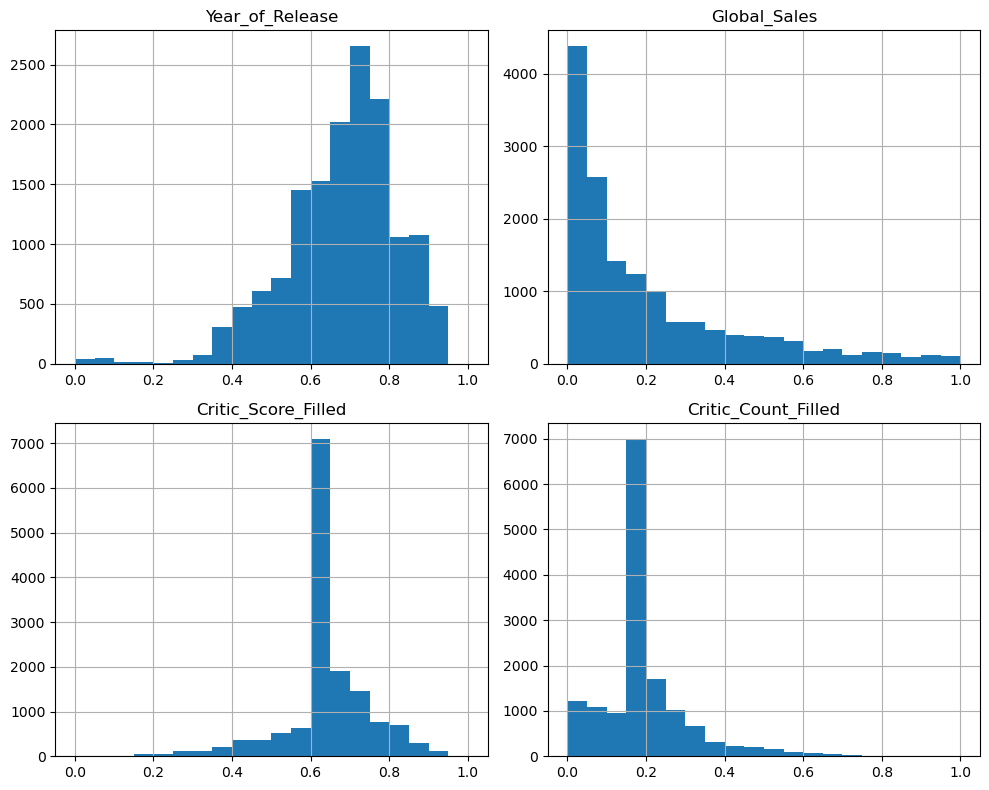

In [98]:
import matplotlib.pyplot as plt

# Assuming data3 is your DataFrame
data3.hist(bins=20, figsize=(10, 8))  

# Adjust the space between the plots
plt.tight_layout()

# Show the plot
plt.show()

NameError: name 'st' is not defined

In [99]:
#Start buildig model

In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
#create x,y
x = data3.drop('Global_Sales',axis='columns')
y = data3.Global_Sales

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [104]:
x.shape

(14824, 45)

In [105]:
x_train.shape

(11859, 45)

In [106]:
y_train.shape

(11859,)

In [107]:
x_test.shape

(2965, 45)

In [108]:
y_test.shape

(2965,)

In [111]:
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor

# # Prepare data
# x = data3.drop('Global_Sales', axis='columns')  # Replace 'data3' with your actual DataFrame name
# y = data3['Global_Sales']

# # Split data into training and testing sets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [113]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [115]:
# Train the classifier
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [117]:
# Make predictions on the test data
y_pred = rf_regressor.predict(x_test)

In [119]:
from sklearn.metrics import mean_absolute_error

y_pred = rf_regressor.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 0.0973860976090647


In [121]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.021584199402367797


In [123]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.14691562000811145


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [125]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.5897844955626744


In [127]:
# Print the results
print("RandomForestRegressor")
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

RandomForestRegressor
Mean Absolute Error (MAE): 0.0973860976090647
Mean Squared Error (MSE): 0.021584199402367797
Root Mean Squared Error (RMSE): 0.14691562000811145
R-squared (R²): 0.5897844955626744


In [130]:
#                                MAE       MSE      RMSE        R²
# Linear Regression         0.137285  0.033769  0.183762  0.338786
# Ridge Regression          0.137302  0.033768  0.183761  0.338800
# Lasso Regression          0.174968  0.051078  0.226004 -0.000141
# ElasticNet Regression     0.174968  0.051078  0.226004 -0.000141
# Random Forest             0.097568  0.021233  0.145717  0.584236
# Gradient Boosting         0.102319  0.021791  0.147616  0.573326
# Support Vector Regressor  0.111883  0.025062  0.158311  0.509259
# K-Nearest Neighbors       0.125412  0.033912  0.184152  0.335980

In [132]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf'),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
}

# Function to evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# Dictionary to store evaluation results
results = {}

# Fit and evaluate each model
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)
    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2}

# Convert results to DataFrame for better readability
results_df = pd.DataFrame(results).T

# Print results
print(results_df)


                               MAE       MSE      RMSE        R²
Linear Regression         0.138587  0.034292  0.185182  0.348260
Ridge Regression          0.138612  0.034301  0.185206  0.348093
Lasso Regression          0.176391  0.052652  0.229461 -0.000677
ElasticNet Regression     0.176391  0.052652  0.229461 -0.000677
Random Forest             0.097386  0.021584  0.146916  0.589784
Gradient Boosting         0.102269  0.021884  0.147933  0.584081
Support Vector Regressor  0.111451  0.024547  0.156674  0.533481
K-Nearest Neighbors       0.125906  0.034029  0.184469  0.353272


In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    results[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Display results
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics}")


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the func

Linear Regression: {'MAE': 0.1385874755658982, 'MSE': 0.034292422423601775, 'RMSE': 0.18518213311116646, 'R2': 0.3482601276685542}
Random Forest: {'MAE': 0.0973860976090647, 'MSE': 0.021584199402367797, 'RMSE': 0.14691562000811145, 'R2': 0.5897844955626744}
Gradient Boosting: {'MAE': 0.10226879227302361, 'MSE': 0.021884275944272977, 'RMSE': 0.14793334966894037, 'R2': 0.5840814325158264}
Support Vector Regressor: {'MAE': 0.11145096024798226, 'MSE': 0.024546687805976936, 'RMSE': 0.15667382616754125, 'R2': 0.5334813335958268}
K-Nearest Neighbors: {'MAE': 0.1259058058299205, 'MSE': 0.03402873231923462, 'RMSE': 0.18446878413226075, 'R2': 0.3532716533296004}


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [136]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for RandomForest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the grid search
grid_search.fit(x_train, y_train)

# Get the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Train the model with the best parameters
best_rf = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_rf.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse}")


r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Test MSE: 0.02096160042094549
R-squared (R²): 0.6016172140464695


In [ ]:
pip install pickle

In [142]:
import pickle

# Assuming model is your trained machine learning model
filename = 'rf_regressor.pkl'
with open(filename, 'wb') as file:
    pickle.dump(rf_regressor,file)

In [144]:
model = pickle.load(open('rf_regressor.pkl', 'rb'))